In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [278]:
# Definition of artificial Hamiltonian
def art_H(p,phi,J,beta_h,N):
    return ((p**2)/2)+((phi**2)/(2*J))-(N*np.log(2*np.cosh(beta_h+phi)))
#Definition of phi dot 
def phi_dot(p,phi):
    return p
#Definition of p dot
def p_dot(p,phi,J,beta_h,N):
    return (phi/J)-(N*np.tanh(beta_h+phi))


In [279]:
def ribbit(p_0,phi_0,Nmd,J,beta_h,N,trajectory_len=1):
    p_f=p_0     # initialize p
    phi_f=phi_0 # and phi

    epsilon=trajectory_len/Nmd # define the step size

    #p_f=p_f+0.5*epsilon*p_dot(p_f,phi_f,J,beta_h,N) # first half step for p

    
    phi_f=phi_f+(0.5*epsilon*phi_dot(p_f,phi_f))

    for i in range(Nmd):        
        phi_f=phi_f-epsilon*phi_dot(p_f,phi_f)      # full step for phi 
        p_f=p_f+epsilon*p_dot(p_f,phi_f,J,beta_h,N) # full step for p 
        
    
    phi_f=phi_f-(0.5*epsilon*phi_dot(p_f,phi_f))
    #p_f=p_f-.5*epsilon*p_dot(p_f,phi_f,J,beta_h,N)  #we go back half step for p

    return p_f,phi_f

In [280]:
#Here we impliment the function calculated in question 1
def m_phi(phi,beta_h):
    return np.tanh(beta_h+phi)

def m_phi_list(phi,beta_h):
    m_phi_l=[]
    for f in phi:
        m_phi_l.append(np.tanh(beta_h+f))
    return m_phi_l

def energy_phi(phi,J,beta_h,N):
    h=beta_h
    return -((phi**2)/(2*J*N))-(np.tanh(beta_h+phi)*h)


In [281]:
Nmd=4           
phi4=[np.random.uniform(0,1)]
prob4=[]
nTraj=12800

J=.1
beta_h=0.5
N=5

mean_magnetization_4=[]

#Implimentation of HMC
for traj in range(nTraj):
    p_start=np.array([np.random.uniform(0,1)]) #Initialization of p with a random variable [0,1]
    phi_start=phi4[-1]                          #Taking the last element of phi which changes with the accept/reject method 
    H_start_HMC=art_H(p_start,phi_start,J,beta_h,N) #Calculation of initial Hamiltonian

    p_out,phi_out=ribbit(p_start,phi_start,Nmd,J,beta_h,N) #Evolve with leap-frog

    H_end_HMC=art_H(p_out,phi_out,J,beta_h,N)  # Calculate Hamiltonian after leap-frog

    if np.random.uniform(0,1)<=np.exp(-(H_end_HMC-H_start_HMC)): #Accept/Reject with exp(-(H_end-H_start))
        phi4.append(phi_out)
        prob4.append(1)
        mean_magnetization_4.append(m_phi(phi_out,beta_h))
    else:
        phi4.append(phi_start)
        prob4.append(0)
        mean_magnetization_4.append(m_phi(phi_start,beta_h))



In [282]:

Nmd=100
phi100=[np.random.uniform(0,1)]
prob100=[]
nTraj=12800

J=.1
beta_h=0.5
N=5

mean_magnetization_100=[]

#Implimentation of HMC
for traj in range(nTraj):
    p_start=np.array([np.random.uniform(0,1)]) #Initialization of p with a random variable [0,1]
    phi_start=phi100[-1]                          #Taking the last element of phi which changes with the accept/reject method 
    H_start_HMC=art_H(p_start,phi_start,J,beta_h,N) #Calculation of initial Hamiltonian

    p_out,phi_out=ribbit(p_start,phi_start,Nmd,J,beta_h,N) #Evolve with leap-frog

    H_end_HMC=art_H(p_out,phi_out,J,beta_h,N)  # Calculate Hamiltonian after leap-frog

    if np.random.uniform(0,1)<=np.exp(-(H_end_HMC-H_start_HMC)): #Accept/Reject with exp(-(H_end-H_start))
        phi100.append(phi_out)
        prob100.append(1)
        mean_magnetization_100.append(m_phi(phi_out,beta_h))
    else:
        phi100.append(phi_start)
        prob100.append(0)
        mean_magnetization_100.append(m_phi(phi_start,beta_h))
        





Text(0, 0.5, 'm')

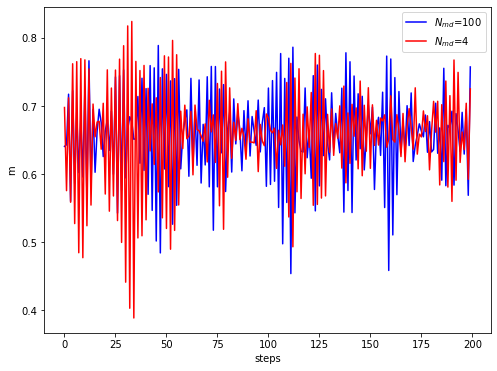

In [283]:
plt.figure(figsize=(8,6))
plt.plot(mean_magnetization_100[50:250],"b-",label=r"$N_{md}$=100") #We plot the first couple hundreds of trajectories for m[φ] for Nmd=100
plt.plot(mean_magnetization_4[50:250],"r-",label=r"$N_{md}$=4") #and for Nmd=4
plt.legend()
plt.xlabel("steps")
plt.ylabel("m")


# Autocorrelation

In [284]:
def estimator_gamma_tau(m,tau):     #We calculate the Gamma estimator from the sheet
    m_bar=sum(m)/len(m)             #we calculate the mean of the list
    sum_of_ms=0                     #for the sum of the magnetisation
    num_of_pairs=0                  #for the #(k,l)
    
    #sum over the correlated sites of the list as indicated in the sheet
    for i in range(len(m)-tau):           
        sum_of_ms+=(m[i]-m_bar)*(m[i+tau]-m_bar)
        num_of_pairs+=1

    return (1/num_of_pairs)*sum_of_ms    # return the formula given in the sheet

def estimator_C_tau(m,tau):
    return estimator_gamma_tau(m,tau)/estimator_gamma_tau(m,tau=0)   #C(τ)=Γ(τ)/Γ(0)
 
    

In [285]:
#Here use the functions defined before to calculate the autocorrelation
C_tau_4=[]
C_tau_100=[]
for t in range(25):
    C_tau_4.append(estimator_C_tau(mean_magnetization_4,t))
    C_tau_100.append(estimator_C_tau(mean_magnetization_100,t))

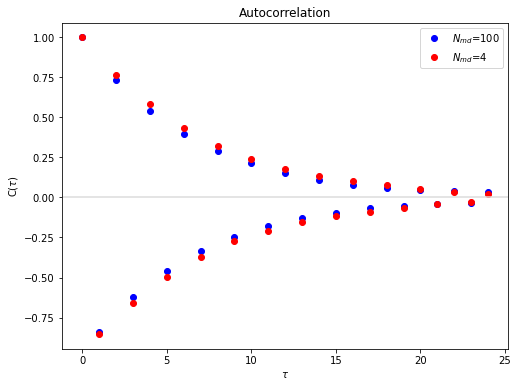

In [286]:
#Make the plot
plt.figure(figsize=(8,6))
plt.plot(C_tau_100,"bo",label=r"$N_{md}$=100")
plt.plot(C_tau_4,"ro",label=r"$N_{md}$=4")
plt.axhline(0,color="gainsboro")
plt.ylabel(r"C($\tau$)")
plt.xlabel(r"$\tau$")
plt.title("Autocorrelation")
plt.legend()

# Binning

In [235]:
#Define the Binning algorithm
def binning(in_list,b): #arguments-> the list to be "binned down" and b(which tell us the size of each bin)
    out_list=[]                             #Initiate a list to return 
    indices=np.arange(0,len(in_list),b)     #We take the indices of the initial list as a function of the bin size 
    for i in indices:
        new_item=0  
        for j in range(b):              #We sum over all the items of the list for the bin size
            new_item+=in_list[i+j]    
        out_list.append(new_item/b)     #We take the average of the bin to append to the new list    
    
    return  out_list


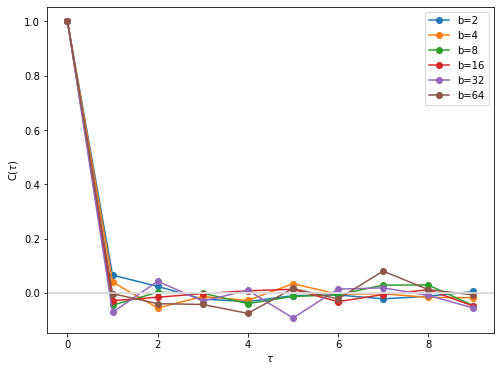

In [270]:
b=[2**i for i in range(1,7)] #[2,4,8,16,32,64]

errors=[]       #List for naive errors 
errors_bs=[]    #List for bootstrap errors
mean=[]         #list for the mean, which stays constant, but just to verify

Nbs=70   #!!! This one was decided from the investigation in the last step

plt.figure(figsize=(8,6)) #create a figure for the plot

for i in b:     # we test the autocorrelation for different size of b
    list_to_examine=binning(mean_magnetization_100,i)   # make a binned list for a specific b
    autocorr=[]
    for t in range(10):       
        autocorr.append(estimator_C_tau(list_to_examine,t)) # we take the autocorrelation of this list for different values of tau

    error=np.std(list_to_examine)/np.sqrt(len(mean_magnetization_100)/i)  # we calculate the naive error
    errors.append(error)                                                  #and append it to plot it afterwards

    flatten_for_bs=np.array(list_to_examine).flatten()              #we flatten the list into a 1d list so we can take np.rndm.choice after
    errors_bs.append(bootstrap_error(flatten_for_bs.flatten(),Nbs)) #we append so we can plot !!!Achtung: the bootstrap_error function is defined 
                                                                    #after so probably it has to be executed with a reversed order(Sorry for that)

    mean.append(sum(list_to_examine)/len(list_to_examine))          #we calculate the mean of every binned list so we can verify that is constant

    # Plot the results
    plt.plot(autocorr,"o-",label="b={}".format(i))
    plt.axhline(0,color="gainsboro")
    plt.ylabel(r"C($\tau$)")
    plt.xlabel(r"$\tau$")
    plt.legend()
    
    

### Behavior of the error as we increase b

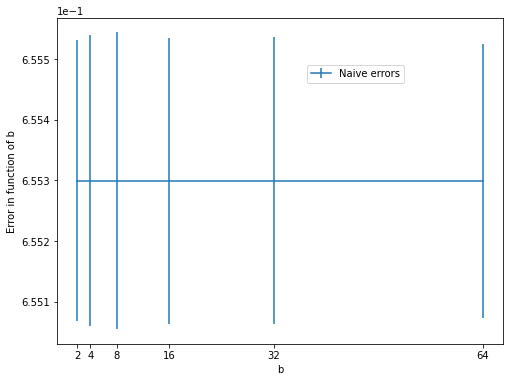

In [277]:
plt.figure(figsize=(8,6))
plt.errorbar(b,mean,yerr=errors,label="Naive errors")                 # Here we plot both naive 
#plt.errorbar(b,mean,yerr=errors_bs,label="Bootstrap errors",alpha=0.8)#and bootstrap errors
plt.xticks(b)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel("Error in function of b")
plt.xlabel("b")
plt.legend(loc=(.56,0.8))

# Bootstrap

In [216]:
#Definition of bootstrap error
def bootstrap_error(in_list,Nbs): #argument-> the list for which we are searching the error
    means_bs=[]     #list to save the means of every new list
    for i in range(Nbs):
        temp_list=[]    # temporaty list to append all the elements randomly chosen from the initial list
        for j in range(len(in_list)):
            temp_list.append(np.random.choice(in_list)) # uniformly and randomly choose elements from the list 
        means_bs.append(sum(temp_list)/len(temp_list))   # save the mean of the new list

    delta_m=np.std(means_bs)     #The final error is the standard deviation of all means
    return delta_m



### Investigation to find a stable error for a $N_{bs}$

In [251]:
mean_mag_bin=np.array([binning(mean_magnetization_100,4)])
errors_bs_inv=[]
Nb_range=np.arange(4,100,4)
for Nbs in Nb_range:
    errors_bs_inv.append(bootstrap_error(mean_mag_bin.flatten(),Nbs))

Text(0, 0.5, 'Bootstrap error')

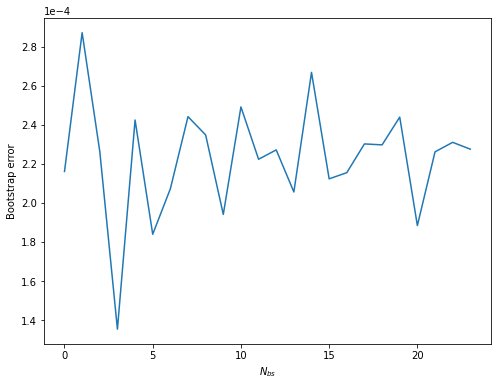

In [271]:
plt.figure(figsize=(8,6))
plt.plot(errors_bs_inv)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel(r"$N_{bs}$")
plt.ylabel("Bootstrap error")